In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option("display.max_rows", 500, "display.max_columns", 100)

In [2]:
data1 = pd.read_csv('.\\data\\measurements.csv')
data2 = pd.read_excel('.\\data\\measurements2.xlsx', engine='openpyxl')

In [3]:
display(data1.shape)
data2.shape

(388, 12)

(388, 12)

In [4]:
display(data1.head())
data1.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [5]:
display(data2.head())
data2.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [6]:
# %%time
# ProfileReport(data1)

In [7]:
# %%time
# ProfileReport(data2)

### AS the 2 data sets are identical in detail and with the excel being a bit cleaner, I will continue using data2

In [8]:
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [9]:
data2[data2['AC']==1]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
40,12.4,4.0,55,21.5,7,AC rain,E10,1,1,0,NaN,NaN
41,4.5,5.0,29,21.5,7,AC,E10,1,0,0,NaN,NaN
60,2.9,7.9,18,21.5,9,AC rain,SP98,1,1,0,NaN,NaN
61,2.1,12.2,23,21.5,9,NaN,SP98,1,1,0,NaN,NaN
69,11.8,4.5,37,21.5,4,AC,SP98,1,0,0,NaN,NaN
94,11.8,5.9,21,20.0,9,AC rain,SP98,1,1,0,NaN,NaN
101,26.2,5.8,71,21.0,8,AC rain,SP98,1,1,0,NaN,NaN
104,12.4,5.4,18,21.0,11,AC rain,SP98,1,1,0,NaN,NaN
153,17.3,5.0,61,21.5,6,AC rain,E10,1,1,0,NaN,NaN
181,12.3,7.1,52,22.5,0,AC snow,E10,1,1,0,NaN,NaN


In [10]:
data2[(data2['specials']== 'snow') | (data2['specials']=='AC snow')]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
118,12.4,4.6,38,23.0,1,snow,SP98,0,1,0,NaN,NaN
124,11.8,4.6,38,23.0,0,snow,SP98,0,1,0,NaN,NaN
125,12.2,6.3,57,23.0,0,snow,SP98,0,1,0,NaN,NaN
181,12.3,7.1,52,22.5,0,AC snow,E10,1,1,0,NaN,NaN


In [11]:
data2['specials'] = np.where(data2['specials']=='AC snow','snow',data2['specials'])

In [12]:
data2['snow'] = np.where(data2['specials']=='snow',1,0)

In [13]:
data2.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'half rain half sun', 'sun',
       'AC sun', 'sun ac', 'ac', 'AC Sun', 'ac rain'], dtype=object)

In [14]:
data2[data2.specials=='half rain half sun']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,snow
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10.0,SP98,0


In [15]:
data = data2.drop('specials', axis = 1)

In [16]:
data = data[['distance','consume','speed','temp_inside','temp_outside','gas_type','AC','rain','snow','sun','refill liters','refill gas']]

In [17]:
data.columns = [i.lower().replace(' ', '_') for i in data.columns]

In [18]:
data[(data.gas_type=='SP98')&(data.refill_gas == 'E10')]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,snow,sun,refill_liters,refill_gas


In [19]:
data[(data.gas_type=='E10')&(data.refill_gas == 'SP98')]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,snow,sun,refill_liters,refill_gas


In [20]:
data.refill_gas = data.refill_gas.fillna(0)

In [21]:
data.refill_gas = np.where(data.refill_gas != 0,1, data.refill_gas)

In [22]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,snow,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,0,45.0,1
1,12.0,4.2,30,21.5,13,E10,0,0,0,0,NaN,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0,NaN,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0,NaN,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0,NaN,0


In [23]:
data.refill_liters = data.refill_liters.fillna(0)

In [24]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,snow,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,0,45.0,1
1,12.0,4.2,30,21.5,13,E10,0,0,0,0,0.0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0,0.0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0,0.0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0,0.0,0


In [75]:
data.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
gas_type          0
ac                0
rain              0
snow              0
sun               0
refill_liters     0
refill_gas        0
dtype: int64

In [72]:
data[pd.isnull(data.temp_inside) == True]

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,snow,sun,refill_liters,refill_gas
93,12.4,4.7,43,NaN,10,SP98,0,0,0,0,0.0,0
95,11.8,5.3,52,NaN,11,SP98,0,0,0,0,0.0,0
97,15.7,5.3,33,NaN,9,SP98,0,0,0,0,0.0,0
98,12.9,5.7,35,NaN,9,SP98,0,0,0,0,0.0,0
99,6.4,4.4,37,NaN,10,SP98,0,0,0,0,0.0,0
100,5.3,4.1,34,NaN,9,SP98,0,0,0,0,0.0,0
102,18.8,5.0,62,NaN,9,SP98,0,1,0,0,0.0,0
201,22.2,3.8,42,NaN,15,SP98,0,0,0,0,0.0,0
203,12.6,4.1,33,NaN,17,SP98,0,0,0,0,0.0,0
261,24.5,3.9,50,NaN,15,E10,0,0,0,1,0.0,0


In [76]:
data.temp_inside = data.temp_inside.fillna(data.temp_inside.mean())

In [77]:
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
gas_type         0
ac               0
rain             0
snow             0
sun              0
refill_liters    0
refill_gas       0
dtype: int64

In [25]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
gas_type          object
ac                 int64
rain               int64
snow               int32
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [26]:
data.refill_gas = data.refill_gas.astype(str).astype(int)

In [27]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
gas_type          object
ac                 int64
rain               int64
snow               int32
sun                int64
refill_liters    float64
refill_gas         int32
dtype: object

In [28]:
data.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [29]:
print('SP98',round(228/388,2))
print('E10',round(160/388,2))

SP98 0.59
E10 0.41


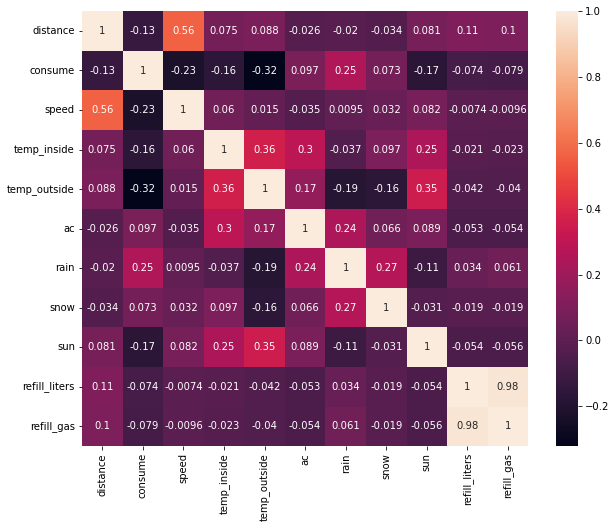

In [30]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sb.heatmap(corr_matrix, annot=True)
plt.show()

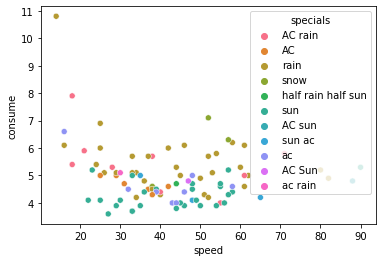

In [31]:
sb.scatterplot(x=data2['speed'], y=data2['consume'], hue=data2['specials'])
plt.show()

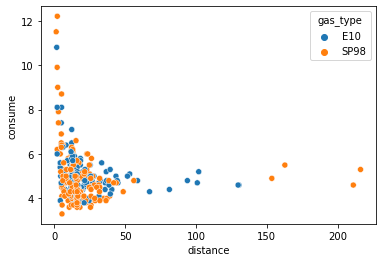

In [32]:
sb.scatterplot(x=data['distance'], y=data['consume'], hue=data['gas_type'])
plt.show()

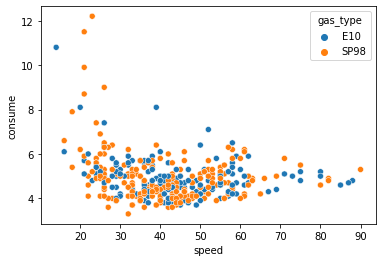

In [33]:
sb.scatterplot(x=data['speed'], y=data['consume'], hue=data['gas_type'])
plt.show()

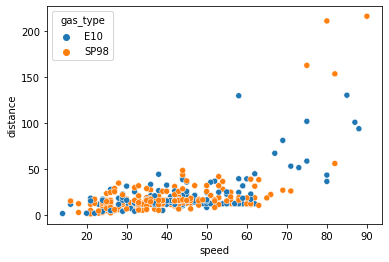

In [34]:
sb.scatterplot(x=data['speed'], y=data['distance'], hue=data['gas_type'])
plt.show()

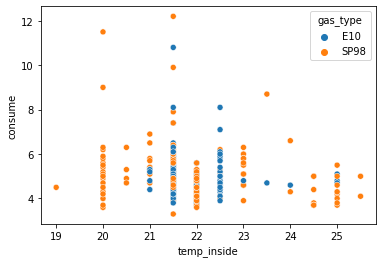

In [35]:
sb.scatterplot(x=data['temp_inside'], y=data['consume'], hue=data['gas_type'])
plt.show()

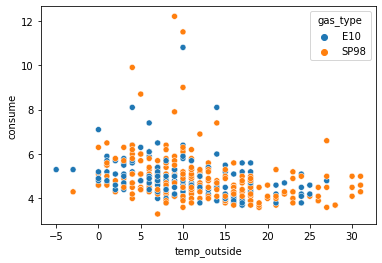

In [36]:
sb.scatterplot(x=data['temp_outside'], y=data['consume'], hue=data['gas_type'])
plt.show()

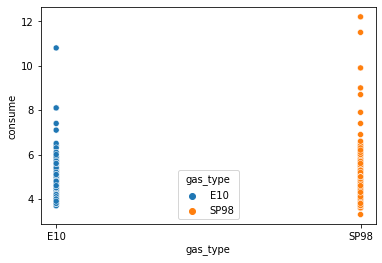

In [37]:
sb.scatterplot(x=data['gas_type'], y=data['consume'], hue=data['gas_type'])
plt.show()

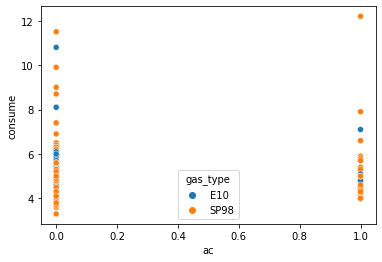

In [38]:
sb.scatterplot(x=data['ac'], y=data['consume'], hue=data['gas_type'])
plt.show()

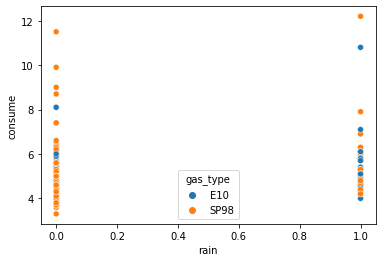

In [39]:
sb.scatterplot(x=data['rain'], y=data['consume'], hue=data['gas_type'])
plt.show()

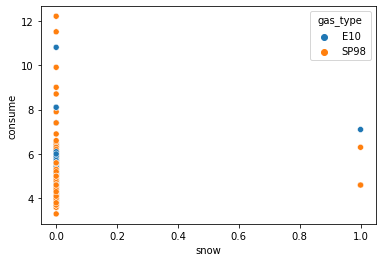

In [40]:
sb.scatterplot(x=data['snow'], y=data['consume'], hue=data['gas_type'])
plt.show()

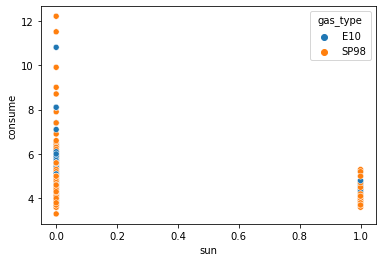

In [41]:
sb.scatterplot(x=data['sun'], y=data['consume'], hue=data['gas_type'])
plt.show()

C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Romeo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


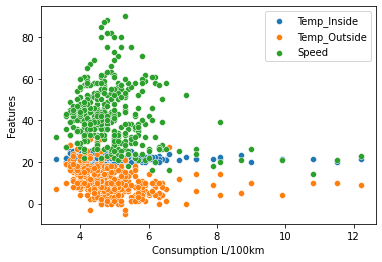

In [42]:
# plt.plot(data.consume,data.temp_inside, label='Temp_Inside')
# plt.plot(data.consume,data.temp_outside, label='Temp_Outside')
# # plt.plot(data.consume,data.speed, label='Speed')

# plt.xlabel('Consumption L/100km')
# plt.ylabel('Features')
# plt.legend(loc = 'upper right')
# plt.show()

sb.scatterplot(data.consume,data.temp_inside, label='Temp_Inside')
sb.scatterplot(data.consume,data.temp_outside, label='Temp_Outside')
sb.scatterplot(data.consume,data.speed, label='Speed')

plt.xlabel('Consumption L/100km')
plt.ylabel('Features')
plt.legend(loc = 'upper right')
plt.show()

In [43]:
data.ac.value_counts()

0    358
1     30
Name: ac, dtype: int64

In [44]:
no_ac = data[data.ac== 0]
with_ac = data[data.ac== 1]

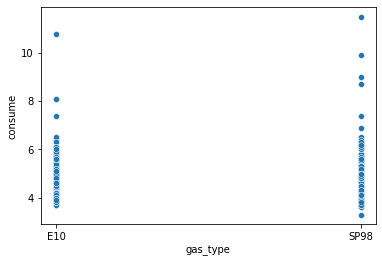

In [45]:
sb.scatterplot(x=no_ac['gas_type'], y=no_ac['consume'])
plt.show()

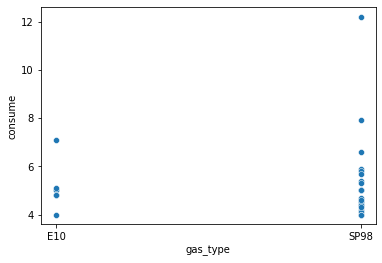

In [46]:
sb.scatterplot(x=with_ac['gas_type'], y=with_ac['consume'])
plt.show()

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,388.0,21.929521,0.994666,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
ac,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
snow,388.0,0.010309,0.101140,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill_liters,388.0,1.243557,6.856419,0.0,0.00,0.0,0.0,45.0


## Predict Consumption

In [104]:
X = data.drop('consume', axis=1)
y = data['consume']

In [105]:
X.dtypes

distance         float64
speed              int64
temp_inside      float64
temp_outside       int64
gas_type          object
ac                 int64
rain               int64
snow               int32
sun                int64
refill_liters    float64
refill_gas         int32
dtype: object

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [107]:
numericals_train = X_train.select_dtypes(np.number).reset_index()
num_train_index = numericals_train[['index']]
numericals_train = numericals_train.drop(['index'],axis=1)

numericals_test = X_test.select_dtypes(np.number).reset_index()
num_test_index = numericals_test[['index']]
numericals_test = numericals_test.drop(['index'],axis=1)

categoricals_train = X_train.select_dtypes(object).reset_index()
cat_train_index = categoricals_train[['index']]
categoricals_train = categoricals_train.drop(['index'],axis=1)

categoricals_test = X_test.select_dtypes(object).reset_index()
cat_test_index = categoricals_test[['index']]
categoricals_test = categoricals_test.drop(['index'],axis=1)

In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


transformer = MinMaxScaler().fit(numericals_train)
numericals_train_normalized = transformer.transform(numericals_train)

normalized_numericals_train = pd.DataFrame(numericals_train_normalized,columns=numericals_train.columns).reset_index(drop=True)

numericals_test_normalized = transformer.transform(numericals_test)
normalized_numericals_test = pd.DataFrame(numericals_test_normalized,columns=numericals_test.columns).reset_index(drop=True)

print(normalized_numericals_train.shape)
print(normalized_numericals_test.shape)

encoder = OneHotEncoder().fit(categoricals_train)
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
cols_train = encoder.get_feature_names_out(input_features=categoricals_train.columns)
encoded_categorical_train = pd.DataFrame(categoricals_train_encoded, index=categoricals_train.index, 
                                         columns=[i.lower() for i in cols_train]).reset_index(drop=True)

categoricals_test_encoded = encoder.transform(categoricals_test).toarray()
cols_test = encoder.get_feature_names_out(input_features=categoricals_test.columns)
encoded_categorical_test = pd.DataFrame(categoricals_test_encoded, index=categoricals_test.index, 
                                        columns=[i.lower() for i in cols_test]).reset_index(drop=True)


print(encoded_categorical_train.shape)
print(encoded_categorical_test.shape)

(310, 10)
(78, 10)
(310, 2)
(78, 2)


In [109]:
X_train = pd.concat([normalized_numericals_train, encoded_categorical_train],axis=1)
X_test = pd.concat([normalized_numericals_test, encoded_categorical_test],axis=1)

In [110]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

LR = linear_model.LinearRegression().fit(X_train,y_train)

# R2 Score

score = LR.score(X_test, y_test)

print("r2 score is:", score)

# Predictions

y_pred = LR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("mse is:", mse)
print("mae is:",mae)
print("rmse is:",rmse)

r2 score is: 0.09950806442646343
mse is: 0.8170217799083994
mae is: 0.656544160930115
rmse is: 0.9038925709996732


In [111]:
from xgboost import XGBRegressor
import xgboost as xgb

model = XGBRegressor(
    max_depth=10,
    n_estimators= 3000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

In [112]:
model.fit(
    X_train, 
    y_train, 
    eval_metric='rmse', 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 40)

[0]	validation_0-rmse:4.10309	validation_1-rmse:4.10153
[1]	validation_0-rmse:3.71298	validation_1-rmse:3.71443
[2]	validation_0-rmse:3.36659	validation_1-rmse:3.38018
[3]	validation_0-rmse:3.05437	validation_1-rmse:3.06962
[4]	validation_0-rmse:2.77446	validation_1-rmse:2.78201
[5]	validation_0-rmse:2.52302	validation_1-rmse:2.52760
[6]	validation_0-rmse:2.29599	validation_1-rmse:2.29279
[7]	validation_0-rmse:2.09159	validation_1-rmse:2.08277
[8]	validation_0-rmse:1.90917	validation_1-rmse:1.90036
[9]	validation_0-rmse:1.74483	validation_1-rmse:1.73454
[10]	validation_0-rmse:1.60385	validation_1-rmse:1.59466
[11]	validation_0-rmse:1.47351	validation_1-rmse:1.47661
[12]	validation_0-rmse:1.35541	validation_1-rmse:1.36031
[13]	validation_0-rmse:1.25672	validation_1-rmse:1.26508
[14]	validation_0-rmse:1.15679	validation_1-rmse:1.17984
[15]	validation_0-rmse:1.07310	validation_1-rmse:1.10586
[16]	validation_0-rmse:0.99461	validation_1-rmse:1.03125
[17]	validation_0-rmse:0.92924	validation

C:\Users\Romeo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Romeo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-rmse:0.27087	validation_1-rmse:0.58772
[40]	validation_0-rmse:0.26019	validation_1-rmse:0.58700
[41]	validation_0-rmse:0.25184	validation_1-rmse:0.58515
[42]	validation_0-rmse:0.24016	validation_1-rmse:0.58979
[43]	validation_0-rmse:0.23147	validation_1-rmse:0.59289
[44]	validation_0-rmse:0.22350	validation_1-rmse:0.59431
[45]	validation_0-rmse:0.21648	validation_1-rmse:0.59196
[46]	validation_0-rmse:0.21204	validation_1-rmse:0.59044
[47]	validation_0-rmse:0.20651	validation_1-rmse:0.59019
[48]	validation_0-rmse:0.19905	validation_1-rmse:0.59087
[49]	validation_0-rmse:0.19414	validation_1-rmse:0.59189
[50]	validation_0-rmse:0.18678	validation_1-rmse:0.59285
[51]	validation_0-rmse:0.18064	validation_1-rmse:0.59553
[52]	validation_0-rmse:0.17557	validation_1-rmse:0.59622
[53]	validation_0-rmse:0.17043	validation_1-rmse:0.59858
[54]	validation_0-rmse:0.16609	validation_1-rmse:0.59787
[55]	validation_0-rmse:0.16064	validation_1-rmse:0.59978
[56]	validation_0-rmse:0.15465	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=3000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

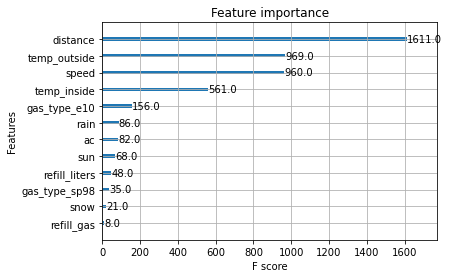

In [113]:
xgb.plot_importance(model)

In [90]:
Y_pred = model.predict(X_train)
Y_test = model.predict(X_test)

In [93]:
pred = [round(value,1) for value in Y_test]
pred_df = pd.DataFrame(pred,columns=['pred'])
pred_df = pd.concat([num_test_index,pred_df],axis=1)
pred_df.set_index('index', inplace=True)
pred_df

,pred
index,
271,4.8
46,5.2
167,4.9
42,4.6
349,4.2
181,5.1
153,4.9
33,4.7
116,5.3


In [94]:
y_df = pd.DataFrame(y_test)
y_df

,consume
271,5.6
46,5.1
167,6.1
42,4.6
349,4.3
181,7.1
153,5.0
33,4.8
116,5.1
148,4.7


In [99]:
merged_df = y_df.merge(pred_df, left_index=True, right_index=True)
merged_df

,consume,pred
271,5.6,4.8
46,5.1,5.2
167,6.1,4.9
42,4.6,4.6
349,4.3,4.2
181,7.1,5.1
153,5.0,4.9
33,4.8,4.7
116,5.1,5.3
148,4.7,4.5


In [100]:
indexed_df = merged_df.copy()
indexed_df.insert(0, 'num', range(0, len(merged_df)))
indexed_df

,num,consume,pred
271,0,5.6,4.8
46,1,5.1,5.2
167,2,6.1,4.9
42,3,4.6,4.6
349,4,4.3,4.2
181,5,7.1,5.1
153,6,5.0,4.9
33,7,4.8,4.7
116,8,5.1,5.3
148,9,4.7,4.5


In [101]:
indexed_df['delta'] = round(indexed_df['consume']-indexed_df['pred'],1)
indexed_df
indexed_df.sort_values(by=['delta','consume'],ascending=False)

,num,consume,pred,delta
181,5,7.1,5.1,2.0
5,65,6.4,4.5,1.9
167,2,6.1,4.9,1.2
126,43,5.5,4.3,1.2
39,44,6.5,5.4,1.1
301,47,5.0,4.1,0.9
57,13,6.2,5.4,0.8
110,72,5.7,4.9,0.8
271,0,5.6,4.8,0.8
357,70,5.0,4.3,0.7


In [102]:
print('accuracy:',len(indexed_df.loc[(indexed_df['delta'] == 0)])/len(indexed_df))
print('correctly predicted:',len(indexed_df.loc[(indexed_df['delta'] == 0)]),'out of:',len(indexed_df))

accuracy: 0.14102564102564102
correctly predicted: 11 out of: 78


## Conclusion:
### distance, speed, temprature outside and in seem to be the most influencal metrics for consumption. Also, gas type E10 seem to be consume more gas than SP98